<a href="https://colab.research.google.com/github/Fercaspe/Movie_Reviews/blob/main/Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

# Preparing Data
Goal: Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).

* Input(x) -> movie review
* Ourput(y) -> sentiment

#Reading dataset

In [2]:
import pandas as pd

df_review = pd.read_csv('https://github.com/Fercaspe/Movie_Reviews/raw/main/IMDB%20Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive
...,...,...
11995,Let's see: what are the advantages to watching...,negative
11996,"For one thing, he produced this movie. It has ...",negative
11997,Contains spoilers The movie plot can be summar...,negative
11998,"After high school Track & Field athelete, Laur...",negative


In [3]:
#taking a smaller sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
# 1000 positives
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive, df_negative])
df_review_imb.value_counts(['sentiment'])

,count
sentiment,
positive,9000
negative,1000


# Dealing with Imbalanced Classes

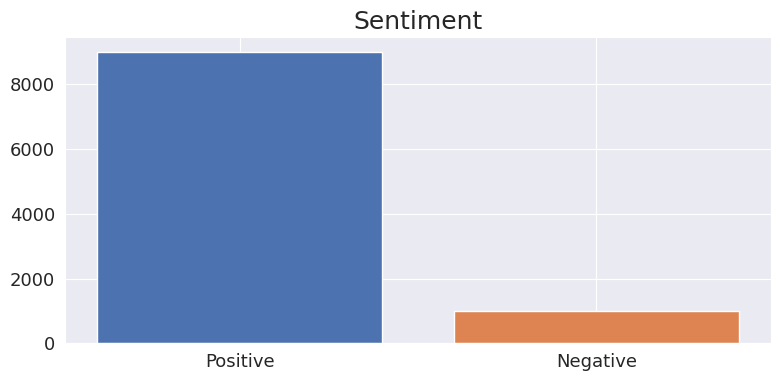

In [4]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

Different options to balanced data

1.   Python imbalanced-learn module
2.   DataFrame.sample



In [5]:
from imblearn.under_sampling import  RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
df_review_bal, df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],
                                                           df_review_imb['sentiment'])
df_review_bal

# option 2
# length_negative = len(df_review[df_review['sentiment']=='negative'])
# df_review_positive = df_review[df_review['sentiment']=='positive'].sample(n=length_negative)
# df_review_non_positive = df_review[~(df_review['sentiment']=='positive')]

# df_review = pd.concat([
#     df_review_positive, df_review_non_positive
# ])
# df_review['sentiment'].value_counts()

# df_review.reset_index(drop=True, inplace=True)

,review,sentiment
10000,Basically there's a family where a little boy ...,negative
10001,"This show was an amazing, fresh & innovative i...",negative
10002,Encouraged by the positive comments about this...,negative
10003,Phil the Alien is one of those quirky films wh...,negative
10004,I saw this movie when I was about 12 when it c...,negative
...,...,...
5413,Knute Rockne led an extraordinary life and his...,positive
519,At the height of the 'Celebrity Big Brother' r...,positive
2602,This is another of Robert Altman's underrated ...,positive
6073,This movie won a special award at Cannes for i...,positive


In [6]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

sentiment
positive    9000
negative    1000
Name: count, dtype: int64
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


# Splitting data into train and test

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

In [8]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [9]:
train_y.value_counts()

,count
sentiment,
negative,675
positive,665


#Text Representation (Bag of Words)
The classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. We need to convert the text to a more manageable representation.



#Count Vectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names_out())
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


#Tfidf

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names_out())
df_dtm

,code,hate,java,love,python,writing
review1,0.438501,0.000000,0.000000,0.616298,0.616298,0.21925
review2,0.438501,0.616298,0.616298,0.000000,0.000000,0.21925


#Turning our text data into numerical vectors

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words='english')
# train_x_vector = cv.fit_transform(train_x)
# test_x_vector = cv.transform(test_x)

In [15]:
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118834 stored elements and shape (1340, 20625)>

Types of matrix

* Sparse matrix
* Dense matrix


In [17]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
10081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10380,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
4757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Model Selection
ML algorithms

1 Supervised learning: Regression (numerical output), Classification (discrete output)
* Input: Review
* Output: Sentiment (discrete)
2 Unsupervised learning

#Support Vector Machines (SVM)

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)
# svc.predict(train_x_vector[0])

SVC(kernel='linear')

## Testing

In [19]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))

['positive']
['positive']
['negative']


#Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

#Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

#Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

#Model Evaluation
##Mean Accuracy
Return the mean accuracy on the given test data and labels.

In [23]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

# svc.score('Test samples', 'True labels')

0.8409090909090909
0.65
0.6348484848484849
0.8303030303030303


#F1 Score
F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it's useful when you have data with imbalance classes.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [24]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

# f1_score(y_true, y_pred, average=None)

array([0.84671533, 0.83464567])

#Classification report
Build a text report showing the main classification metrics.

In [25]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))
# classification_report(y_true, y_pred)

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



#Confusion Matrix
A confusion matrix) is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives

In [26]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y,
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative'])
conf_mat

array([[290,  45],
       [ 60, 265]])

#Tuning the Model
##GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5,)
#              refit=True, verbose=0)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [28]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
